# DIGIT RECOGNIZER - Metode CNN MULTILAYER

In [1]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [124]:
# import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from keras.utils import np_utils
from keras.datasets import mnist

from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# DATA UNDERSTANDING

In [45]:
# read data train dan test
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
# tampilkan train
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# deskripsi train
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [47]:
# info train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [48]:
# ukuran train
train.shape

(42000, 785)

In [49]:
# count value train label
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [50]:
# tampilkan test
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# deskripsi test
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [52]:
# info test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [53]:
# ukuran test
test.shape

(28000, 784)

# DATA VISUALIZATION

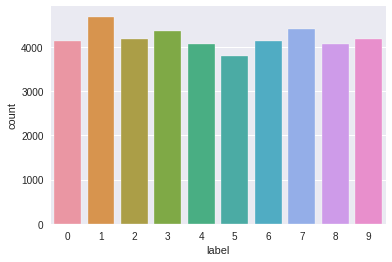

In [54]:
# count plot train label
sns.countplot(train['label'])

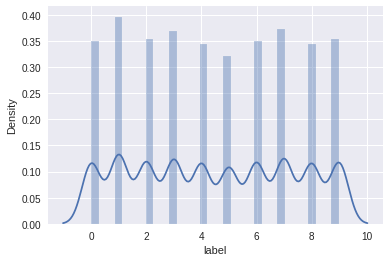

In [55]:
# distribusi plot train label
sns.distplot(train['label'])

In [56]:
# tentukan variabel dependen y_train yaitu train label
y_train = train['label']
# tentukan variabel x_train yaitu seluruh kolom dalam train kecuali kolom label
X_train = train.drop(labels=['label'], axis=1)
# tentukan x_test yaitu semua nilai dalam test
X_test = test

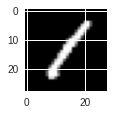

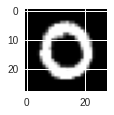

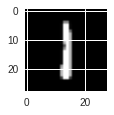

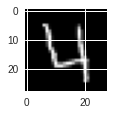

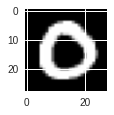

In [57]:
# plot gambar tabel X_train dari range index 0-5
for i in range(0,5):
    # index pada tiap baris X_train akan bertambah 1, dan reshape tiap baris X_train menjadi 28x28 pixel
    digit=(X_train.iloc[i:i+1,:].to_numpy()).reshape(28,28)
    # atur ukuran gambar 
    plt.figure(figsize=(1.5,1.5))
    #tampilkan gambar
    plt.imshow(digit, 'gray')

In [58]:
#bandingkan hasil 5 plot gambar yang di prediksi dengan nilai 5 y_train
y_train.head(5)


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

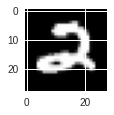

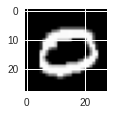

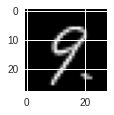

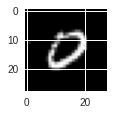

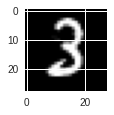

In [59]:
# plot gambar tabel X_test dari range index 0-5
for i in range(0,5):
    # index pada tiap baris X_test akan bertambah 1, dan reshape tiap baris X_test menjadi 28x28 pixel
    digit=(X_test.iloc[i:i+1,:].to_numpy()).reshape(28,28)
    # atur ukuran gambar 
    plt.figure(figsize=(1.5,1.5))
    #tampilkan gambar
    plt.imshow(digit, 'gray')

# DATA PREPARATION

### Handling missing value

In [60]:
# cek missing value data
print('Banyak missing value train   : ', len(train.isnull().sum()[train.isnull().sum()>0]))
print('Banyak missing value test    : ', len(test.isnull().sum()[test.isnull().sum()>0]))
print('Banyak missing value X_train : ', len(X_train.isnull().sum()[X_train.isnull().sum()>0]))
print('Banyak missing value X_test  : ', len(X_test.isnull().sum()[X_test.isnull().sum()>0]))
print('Banyak missing value y_train : ', len(y_train.isnull().sum()[y_train.isnull().sum()>0]))

Banyak missing value train   :  0
Banyak missing value test    :  0
Banyak missing value X_train :  0
Banyak missing value X_test  :  0
Banyak missing value y_train :  0


### Data normalization
karena X_train dan X_test tidak berdistribusi normal, maka X_train dan X_test harus di trainsformasi dengan membagikan nilai X_train dan X_test dengan 255. Dimana 255 merupakan nilai pixel dari tiap gambar yaitu atara 0-255 menjadi antara 0-1.

In [61]:
# normalisasi X_train
X_train = X_train / 255
# normalisasi X_test
X_test = X_test / 255

In [74]:
# cek data yang telah dinormalisasi
print(X_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [73]:
# cek data yang telah dinormalisasi
print(X_test[1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  29.  85.  85.
  85.  85.  85.  85.  85.  85.  71.   0.   0.   0.   0.   0.   0.   0.
   0. 

### Data formating

In [66]:
# ubah type data X_train menjadi float32
X_train = X_train.values.astype('float32')
# ubah type data y_train menjadi integer 
y_train = y_train.values.astype('int32')
# ubah type data X_test menjadi float32 
X_test = test.values.astype('float32') 

In [67]:
# cek ukuran data
print('Ukuran X_train : ', X_train.shape)
print('Ukuran y_train : ', y_train.shape)
print('Ukuran X_test  : ', X_test.shape)

Ukuran X_train :  (42000, 784)
Ukuran y_train :  (42000,)
Ukuran X_test  :  (28000, 784)


Convert nilai y_train dengan menggunakan metode one-hot menjadi matriks biner yang memiliki ukuran 1x9 karena nilai y_train berada diantara 0-9, yang berbentuk
*  y_train bernilai 1 hasil convert [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 0 hasil convert [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 1 hasil convert [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
*  y_train bernilai 4 hasil convert [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
*  y_train bernilai 0 hasil convert [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [68]:
# tampilkan train['label]
train['label'].head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [69]:
# convert y_train menjadi matriks binery 
Y_train = np_utils.to_categorical(y_train)
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [70]:
# cek ukuran dalam tiap matriksnya
Y_train.shape[1]

10

In [71]:
# recek ukuran y_train dan Y_train
print('Ukuran y_train :', y_train.shape)
print('Ukuran Y_train :', Y_train.shape)

Ukuran y_train : (42000,)
Ukuran Y_train : (42000, 10)


### SPLIT DATA 
split/bagi data X_train dan Y_train menjadi 90% data training dan 10% data validation

In [72]:
# split data train menjadi 80 data traini dan 20% data validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.10, random_state=7)

In [75]:
# tampilkan Y_val
Y_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [76]:
# kembalikan nilai Y_val yang telah dikonvert menggunakan metode one-hot kedalam bentuk awal
y_val = np.argmax(Y_val, 1)
y_val

array([1, 1, 4, ..., 0, 2, 2])

In [77]:
# recek kembali ukuran data yang telah displit
print('Ukuran X_train :', X_train.shape)
print('Ukuran X_val   :', X_val.shape)
print('Ukuran Y_train :', Y_train.shape)
print('Ukuran Y_val   :', Y_val.shape)

Ukuran X_train : (37800, 784)
Ukuran X_val   : (4200, 784)
Ukuran Y_train : (37800, 10)
Ukuran Y_val   : (4200, 10)


In [78]:
# reshape baris X_train, X_test dan X_val dari tiap gambar yang ditampilkan berukuran 28 x 28 pixel dengan type data float32
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28).astype('float32')


In [79]:
# recek ukuran data yang telah direshape
print('Ukuran X_train :', X_train.shape)
print('Ukuran X_test  :', X_test.shape)
print('Ukuran X_val   :', X_val.shape)

Ukuran X_train : (37800, 1, 28, 28)
Ukuran X_test  : (28000, 1, 28, 28)
Ukuran X_val   : (4200, 1, 28, 28)


In [80]:
# cetak X_train
print(X_train[1])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [81]:
# cetak X_test
print(X_test[1])

[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  29.  85.  85.
    85.  85.  85.  85.  85.  85.  71.   0.   

In [82]:
# cetak X_val
print(X_val[1])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

# MODELING
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
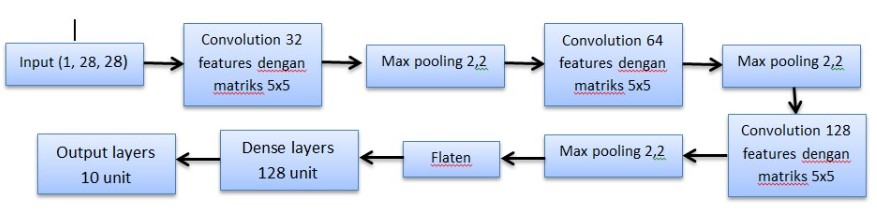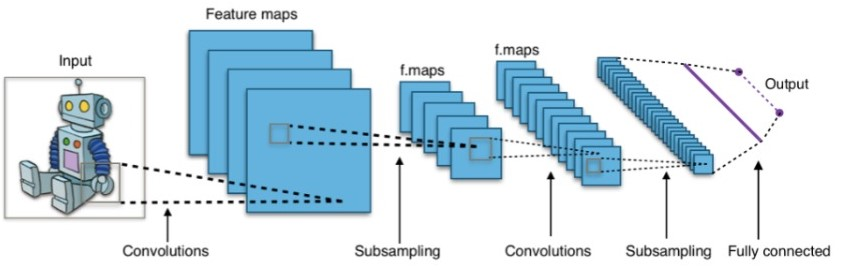

In [158]:
# buat variabel batch_size yang bernilai 64, epochs (max iterasi) sebesar 30, num_classes (banyak klas) sebesar 10, dimana
# variabel ini nantinya akan digunakan dalam model CNN multi layer
batch_size = 64
epochs = 30
num_classes = 10

In [163]:
# buat model sequantial
model = Sequential()
# definisikan 32 feature map dengan matriks 5x5
model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(1,28,28),padding='same'))
model.add(LeakyReLU(alpha=0.1))
# atur max poolingnya 2,2
model.add(MaxPooling2D((2, 2),padding='same'))
# definisikan 64 feature dengan matriks 3x3
model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
# atur max poolingnya 2,2
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# definisikan 128 feature mat dengan matriks 3x3
model.add(Conv2D(128, (5, 5), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))  
# atur max poolinya 2,2                
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))
# compile model yang dibuat
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


## Koreksi hasil prediksi 
Koreksi hasil prediksi yang dihasilkan dengan menggunakan model CNN sederhana dengan menggunakan data validation yaitu X_val apakah hasil yang diberikan bebar atau salah.

In [164]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 1, 28, 32)         22432     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 1, 14, 64)         51264     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 1, 14, 64)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 7, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 1, 7, 128)       

In [165]:
# fit model dengan X_train dan Y_train
history = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, Y_val))


Epoch 1/30
591/591 [==============================] - 41s 68ms/step - loss: 0.6384 - accuracy: 0.7952 - val_loss: 0.1224 - val_accuracy: 0.9640
Epoch 2/30
591/591 [==============================] - 39s 66ms/step - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.0872 - val_accuracy: 0.9762
Epoch 3/30
591/591 [==============================] - 39s 66ms/step - loss: 0.0610 - accuracy: 0.9807 - val_loss: 0.0642 - val_accuracy: 0.9838
Epoch 4/30
591/591 [==============================] - 39s 67ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0575 - val_accuracy: 0.9845
Epoch 5/30
591/591 [==============================] - 39s 67ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 6/30
591/591 [==============================] - 39s 66ms/step - loss: 0.0283 - accuracy: 0.9898 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 7/30
591/591 [==============================] - 39s 66ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0709 - val_accuracy:

In [166]:
# Evaluasi model CNN multlayer yang dihasilkan
scores = model.evaluate(X_val, Y_val, verbose=0)
print ('nilai skor dan akurasi model :',scores)
print ('Score model                  :',format(scores[0]))
print ('Accuracy model               :',format(scores[1]))

nilai skor dan akurasi model : [0.09384528547525406, 0.9864285588264465]
Score model                  : 0.09384528547525406
Accuracy model               : 0.9864285588264465


In [167]:
# definisikan variabel predicted_classes yang berisi nilai yang akan diprediksi
predicted = model.predict_classes(X_val)
predicted

array([1, 1, 4, ..., 0, 2, 2])

In [168]:
# indeks hasil prediksi yang bernilai sama dengan nilai y_val, atau dapat dikatakan prediksinya bebar
correct = np.nonzero(np.equal(predicted, y_val))[0]
correct

array([   0,    1,    2, ..., 4197, 4198, 4199])

In [169]:
# banyanya prediksi yang benar
len(correct)

4143

In [170]:
# # indeks hasil prediksi yang nilainya tidak sama dengan nilai y_val, atau dapat dikatakan prediksinya salah
incorrect = np.nonzero(np.not_equal(predicted, y_val))[0]
incorrect

array([ 133,  202,  264,  275,  334,  404,  406,  432,  449,  530,  626,
        696,  786,  894, 1015, 1203, 1232, 1250, 1394, 1471, 1494, 1641,
       1679, 1736, 1827, 1994, 2064, 2324, 2369, 2436, 2455, 2502, 2609,
       2702, 2840, 2888, 2894, 2917, 2953, 3044, 3117, 3126, 3145, 3157,
       3164, 3261, 3330, 3398, 3553, 3702, 3736, 3760, 3878, 4066, 4069,
       4073, 4193])

In [171]:
# banyaknya prediksi yang salah
len(incorrect)

57

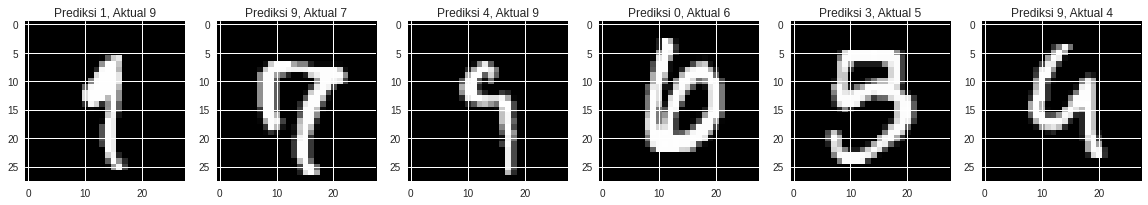

In [172]:
# plot gambar hasil prediksi yang bernilai salah

# atur ukuran gambar yaotu 16, 10
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect[:6]):
    # tampilkan gambar 
    plt.subplot(1,6,i+1)
    # tampilkan gambar dengan ukuran 28x28 pixel dengan skala warna abu-abu
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    # atur judul 
    plt.title("Prediksi {}, Aktual {}".format(predicted[incorrect], y_val[incorrect]))

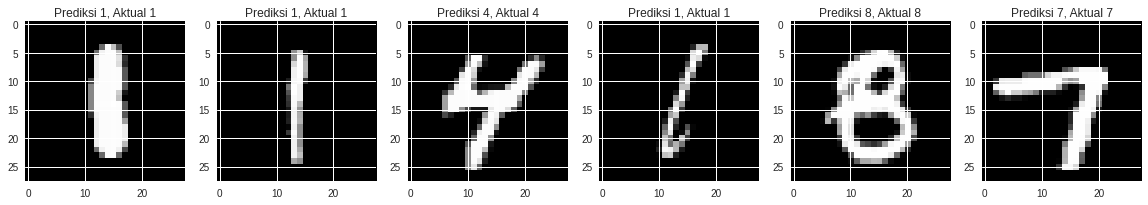

In [173]:
# plot gambar hasil prediksi yang bernilai bebar

# atur ukuran gambar yaotu 16, 10
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct[:6]):
    # tampilkan gambar 
    plt.subplot(1,6,i+1)
    # tampilkan gambar dengan ukuran 28x28 pixel dengan skala warna abu-abu
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    # atur judul 
    plt.title("Prediksi {}, Aktual {}".format(predicted[correct], y_val[correct]))

In [174]:
# cetak seluruh nilai pada model yang di fit 
history_dict = history.history
history_dict

{'accuracy': [0.9026983976364136,
  0.9725925922393799,
  0.9807407259941101,
  0.9845767021179199,
  0.9878306984901428,
  0.9894973635673523,
  0.9906349182128906,
  0.9923545122146606,
  0.9940740466117859,
  0.9935185313224792,
  0.9951587319374084,
  0.9953174591064453,
  0.9957671761512756,
  0.9961640238761902,
  0.9965079426765442,
  0.9957936406135559,
  0.9966137409210205,
  0.9971693158149719,
  0.9977777600288391,
  0.9969047904014587,
  0.9962962865829468,
  0.9982539415359497,
  0.9971693158149719,
  0.9976454973220825,
  0.9966402053833008,
  0.998624324798584,
  0.9975132346153259,
  0.9978836178779602,
  0.9975661635398865,
  0.9976190328598022],
 'loss': [0.30407458543777466,
  0.08829183876514435,
  0.06017133221030235,
  0.04724707454442978,
  0.036974404007196426,
  0.030956365168094635,
  0.027936510741710663,
  0.02224176749587059,
  0.018872113898396492,
  0.020011350512504578,
  0.015165799297392368,
  0.013952013105154037,
  0.012679428793489933,
  0.012091268

In [175]:
# Cetak kunci dari setiap nilai dari model yang difitkan 
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

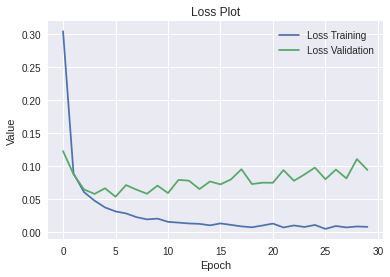

In [176]:
# plot fungsi validasi dari y_val dan predicted
plt.plot(history.history['loss'], label = 'Loss Training')
plt.plot(history.history['val_loss'], label = 'Loss Validation')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

#Confution Matrix
bandingkan nilai sebenrnya dan hasil prediksi dengan menggunakan confusion matriks.

In [177]:
# nilai unik dalam y_train
class_names = np.unique(y_train)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [178]:
# hitung matriks confusion dari y_val dan redicted
cnf_matrix = confusion_matrix(y_val, predicted)
np.set_printoptions(precision=2)

In [179]:
# cetan matriks confusion dari y_val dan Predicted dari 10 kelas yaitu 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print (cnf_matrix)

[[429   0   0   0   0   0   0   0   0   0]
 [  0 495   0   1   0   0   0   2   0   0]
 [  0   0 428   0   0   0   0   4   1   0]
 [  0   0   0 438   0   2   0   1   3   0]
 [  2   0   0   0 389   1   1   2   0   4]
 [  0   0   0   2   0 347   0   0   0   0]
 [  3   0   0   0   1   0 402   0   0   0]
 [  1   2   1   0   0   0   0 433   0   6]
 [  0   2   0   0   0   2   0   0 396   1]
 [  1   1   0   0   6   0   0   2   2 386]]


In [180]:
# hitung matriks persentase confusion y_val dan predictednya 
# dengan cara membagikan tiap nilai matrik dengan jumlah keseluruhan nilai pada kolomnya
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# cetak matriks persentase konfusionya 
print(cnf_matrix_percent)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.   0.   0.   0.97 0.   0.   0.01 0.   0.01]
 [0.   0.   0.   0.01 0.   0.99 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.99 0.  ]
 [0.   0.   0.   0.   0.02 0.   0.   0.01 0.01 0.97]]


In [181]:
# prediksi nilai prediksi menggunakan X_test
predicted = model.predict_classes(X_test)
predicted

array([2, 0, 9, ..., 3, 9, 2])

In [182]:
# cek ukuran hasil prediksinya
predicted.shape

(28000,)

In [183]:
 # buat dataframe baru yang berisi data yg akan disubmit ke kaggle
submissions = pd.DataFrame({'ImageId': list(range(1, len(predicted) + 1)), 
                            "Label": predicted})
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [184]:
# save data submission
submissions.to_csv("submission.csv", index=False, header=True)